From https://www.machinelearningplus.com/time-series/time-series-analysis-python/

# Time series analysis with Python

In [3]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})

Importing the dataframe to use:


In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


Or better still, we can use the date as index of our data:


In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


Visualize the data:

In [7]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x,y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show

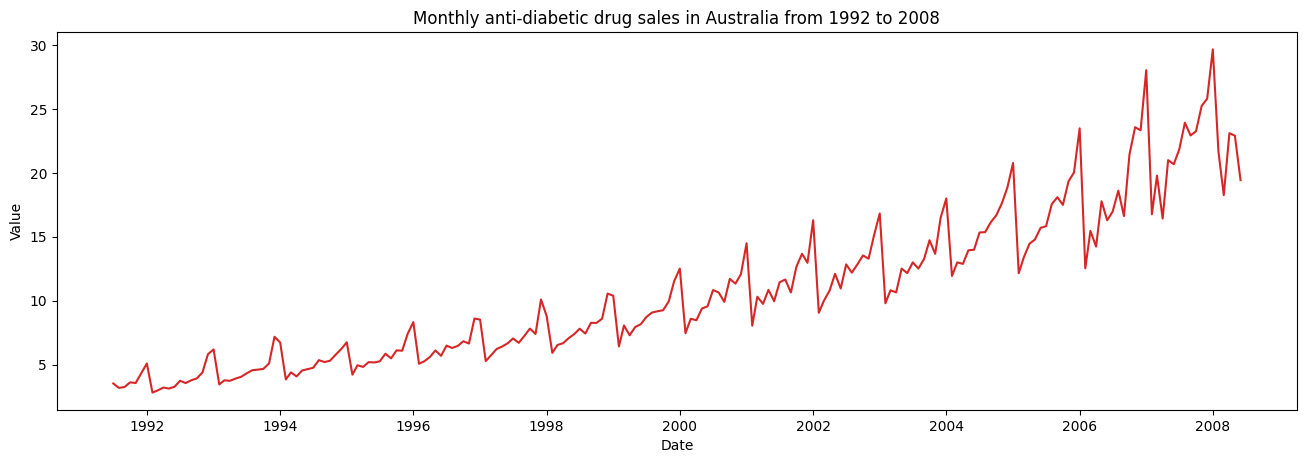

In [10]:
plot_df(df, df.index, df.value, title="Monthly anti-diabetic drug sales in Australia from 1992 to 2008")

Seasonal plots:


In [18]:
df.reset_index(inplace=True)
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [26]:
#prepare the data
df['year'] = df.date.apply(lambda x: x.year)
#df['month'] = df.date.apply(lambda x: x.month) #For numeric months
df['month'] = [d.strftime('%b') for d in df.date]
years = df.year.unique()

In [24]:
df

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [27]:
#Colors:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

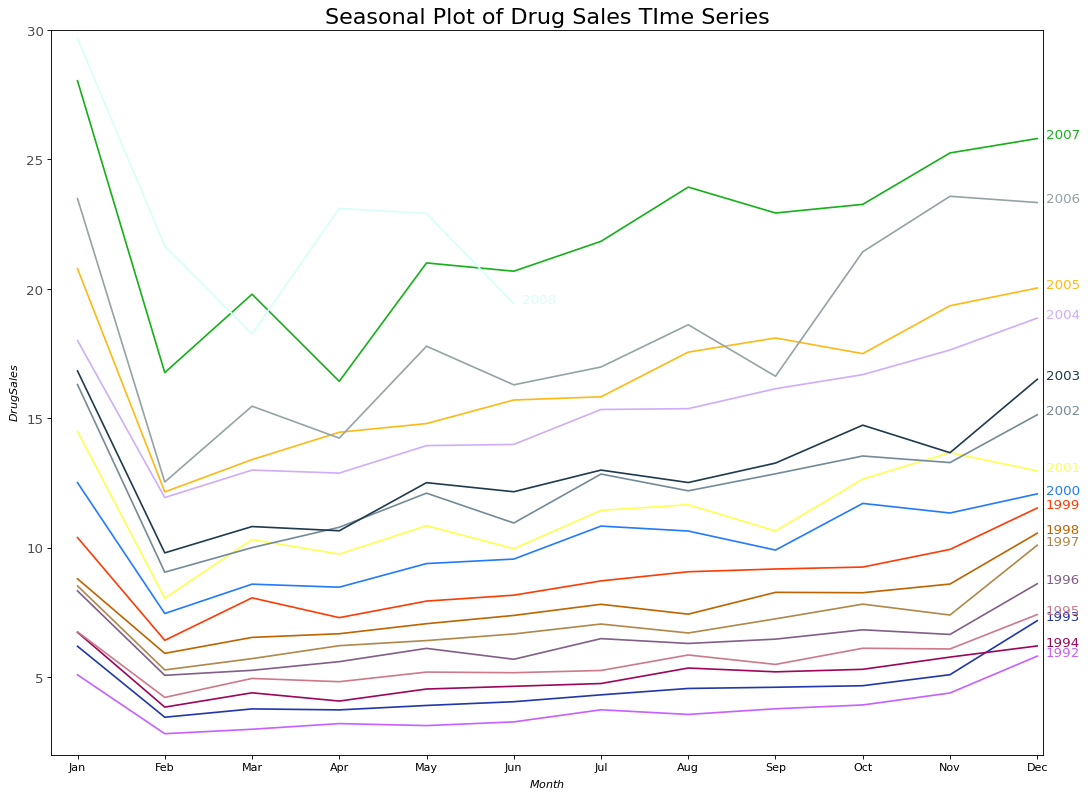

In [43]:
plt.figure(figsize=(16,12), dpi=80)
for i, e in enumerate(years):
    if i>0:
        plt.plot('month', 'value', data=df.loc[df.year==e, :], color = mycolors[i], label=e)
        plt.text(df.loc[df.year==e, :].shape[0]-0.9, df.loc[df.year==e, 'value'][-1:].values[0], e, fontsize=12, color=mycolors[i])

#Decoration:
plt.gca().set(xlim=(-0.3, 11.07), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title('Seasonal Plot of Drug Sales TIme Series', fontsize = 20)

plt.show()

Yearly and monthly box plots:

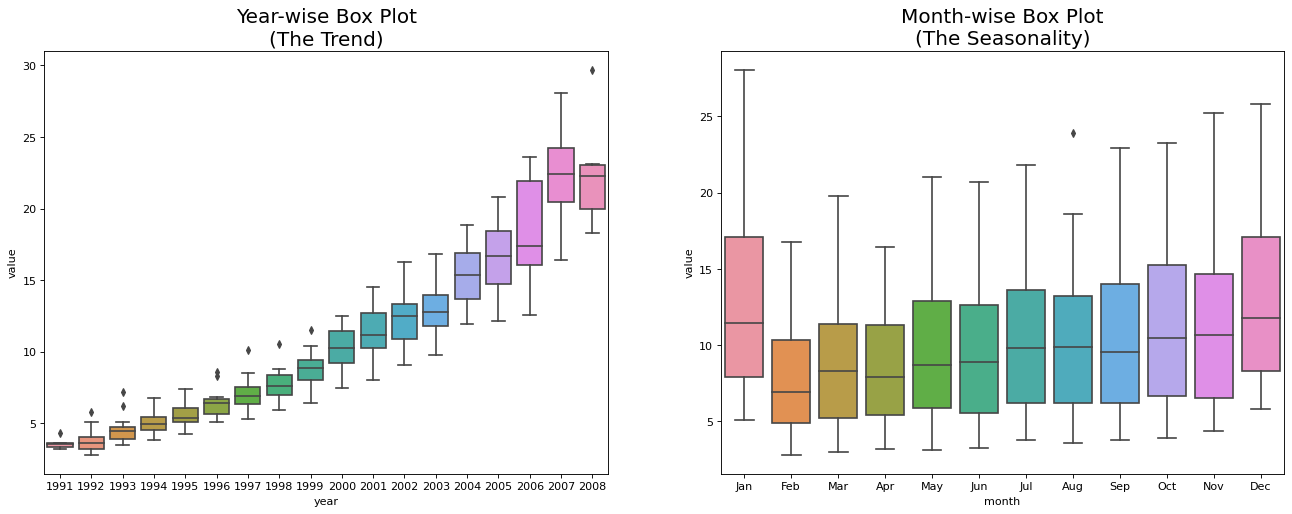

In [48]:
fig, axes = plt.subplots(1, 2, figsize = (20, 7), dpi=80)
sns.boxplot(x='year', y='value', data=df, ax = axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :], ax = axes[1])

axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()